In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [7]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [8]:
housing = pd.read_csv('D:\programming\machine learning\handson_pythonebook\handson-ml2-master\handson-ml2-master\datasets\housing\housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
# checking the categories for ocean proximity
# all other columns are float64
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
# numerical data
# here null values are ignored
# check the std deviation, this will tell you the spread of the data
# when data follows normal distribution then it means 68-95-97 rule applies, 68% of the values fall within 1st dev, 95% within
# 2nd std, 97% falls within 3rd std
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


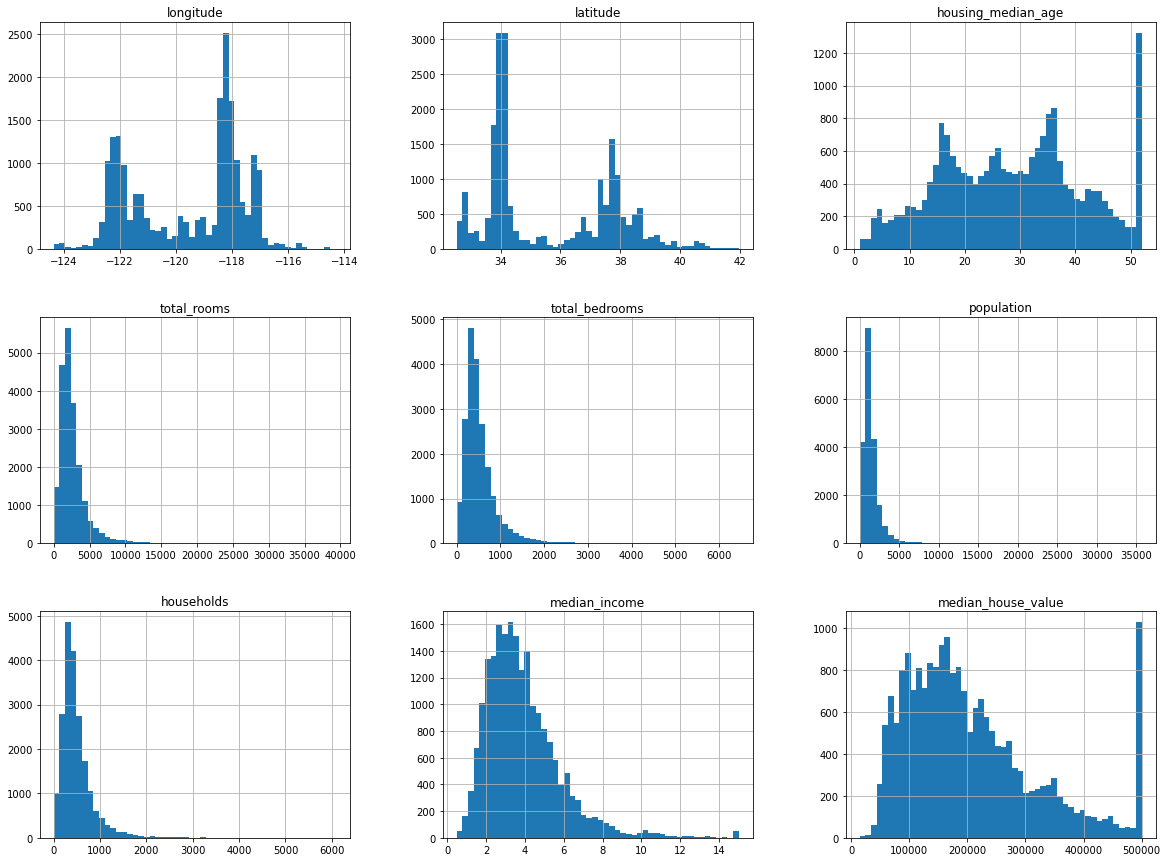

In [12]:
#plotting histogram for each input feature
housing.hist(bins=50, figsize=(20,15))
plt.show()

Seems like median_house_value is capped at 500000, need to confirm this with the client team. This can create an issue since
model may learn that prices never go beyond that limit. what if they want to predict the value beyond this point.
1. collect proper labels for the districts whose labels are capped.
2. remove those districts from the training and test datasets since your system shouldn't be evaluated poorly if it predicts
values beyond $500000

We can see the similar capped thing in the housing_median_age column. Look at the spike in the end, show that the data is capped.

All features seems to be on different scales.
Moreover, we can see distribution is not normal, graph extends much further to the right, need to apply some transformation to 
make them bell-curved

In [13]:
def data_distribution(df, var):
                    
    plt.figure(figsize=(20,4))
    plt.subplot(1,3,1)
    plt.hist(df[var], bins=30)
    plt.title('Histogram')

    plt.subplot(1,3,2)
    stats.probplot(df[var], plot=plt)
    plt.title('Q-Q plot')

    plt.subplot(1,3,3)
    sns.boxplot(y=df[var])
    plt.title('boxplot')
    plt.show()


### Create a test set now

since we don't need to see any pattern in the whole data that can give you an indication to choose a particular machine learning
algorithm. This can lead you to have less error for test data and your model won't be generalized.
because your model will be according to the ptterns in the test data.Hence this needs to be avoided.

In [14]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(housing.drop(labels=['median_house_value'], axis=1),
                                                    housing['median_house_value'],
                                                    test_size=0.3,
                                                    random_state=0)

random_state will make sure that train_test_split will split the data everytime in the same way that
it did in the first run. This is good as you wanted to avoid getting different data each time you run
the program because in that case your model will learn the pattern in the whole dataset and thus 
whole point of splitting the data into training and testing will be gone.

It will always generates the same indcies.

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14448, 9), (6192, 9), (14448,), (6192,))

Suppose you chatted with experts who told you the median income is very important attribute to predict
median house prices. You may want to ensure that the test set is representative of the various categories
of incomes of the whole dataset. Since median income is a continuous numerical attribute, you first 
need to create an income category attribute.

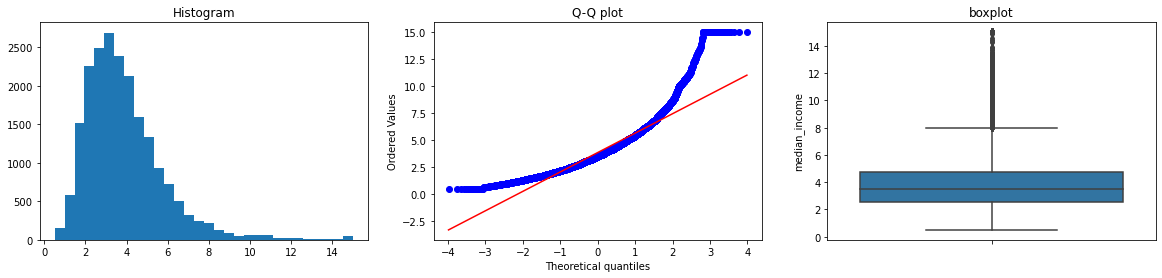

In [16]:
# checking the data distribution of median income
data_distribution(housing, "median_income")

we can see most of the median_income is in the range from 1.5 to 6. Try not to have too many categories
and each category should be large enough or all should be equal in size.

In [17]:
#creating categories for median_income
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins=[0., 1.5, 3, 4.5, 6, np.inf],
                              labels=[1, 2, 3, 4, 5])

category 1: from 0 to 1.5

category 2: from 1.5 to 3

category 3: from 3 to 4.5

category 4: from 4.5 to 6

category 5: from 6 to np.inf

In [18]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


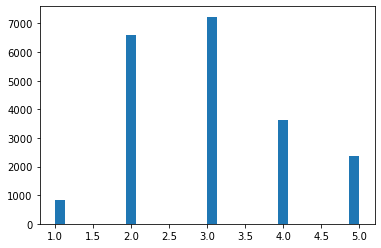

In [19]:
plt.hist(housing['income_cat'], bins=30)
plt.show()

Stratified Sampling: Dividing the dataset in such a way that test set represent that whole
    dataset. Proportion of income_cat should be same as in the original dataset and in the test set.

    

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

In [21]:
split = StratifiedShuffleSplit(n_splits=1, test_size =0.2, random_state=42)

In [22]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    #print('training index: ',train_index)
    #print('test index: ',test_index)
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

### Lets start by looking at the income category proportions in the test set

In [23]:
strat_test_set['income_cat'].value_counts()/ len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

Lets cross check the proportions of income categories within the main dataset and compare it with 
the test dataset

In [24]:
housing['income_cat'].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

It is approximately the same which is great and what we wanted.

In [25]:
# removing income category now from the training and test dataset
strat_test_set = strat_test_set.drop(labels=['income_cat'], axis=1)
strat_train_set = strat_train_set.drop(labels=['income_cat'], axis=1)

In [26]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [27]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND


Now we will not touch the test data and will play with training data.

In [28]:
#lets make a copy of the training data so that we can play with it and not harming the actual training
#data
housing_train = strat_train_set.copy()

In [29]:
housing_train.shape

(16512, 10)

### Visualize the data

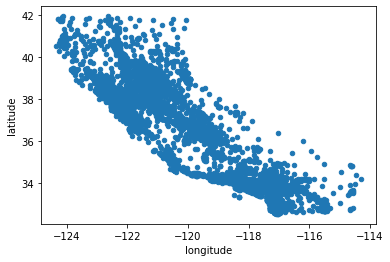

In [30]:
#let visualize the geographical data
# create a scatter plot between latitude and longitude
housing.plot(kind="scatter", x= "longitude", y="latitude")
plt.show()

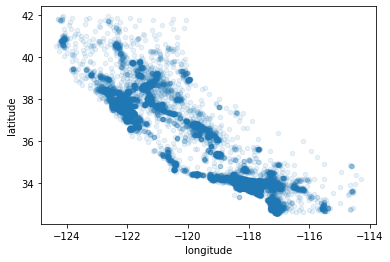

In [31]:
# very high density, let lighten it a bit
housing.plot(kind="scatter", x= "longitude", y="latitude", alpha=0.1)
plt.show()

Now we can clearly see which area is more densely populated

In [32]:
housing_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

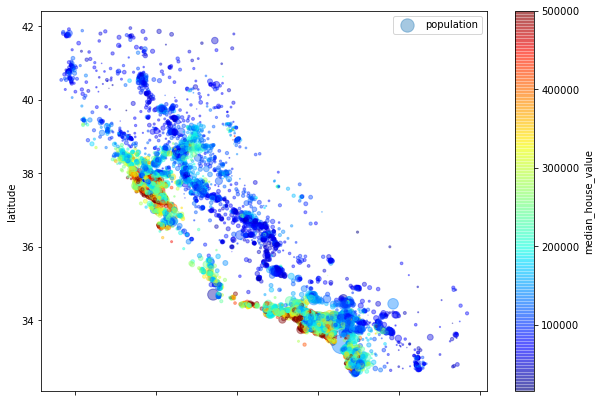

In [33]:
# we can put population as the size and median_house_value as the color in the above scatterplot
# to get some more insights
housing_train.plot(kind="scatter",x="longitude", y="latitude", alpha=0.4,
                  s=housing_train['population']/100, label="population", figsize=(10,7),
                  c="median_house_value", colorbar=True, cmap=plt.get_cmap("jet"))
plt.legend()
plt.show()

The above image tells you that housing price is very close to ocean and to population density which
is expected. We can here use clustering algorithm to detect the main clusters.

### Looking for correlations

In [34]:
corr_matrix = housing_train.corr()
# check the correlation w.r.t median_house_value
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Positive correlation between median_income and median_house_value.

Negative correlation between latitude and median_house_value.

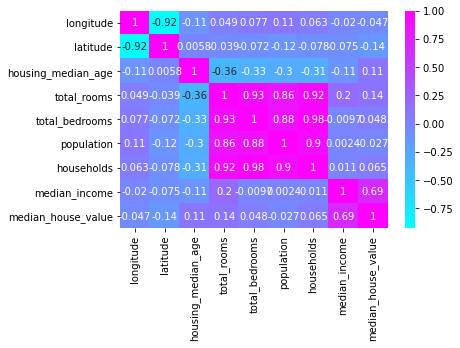

In [35]:
sns.heatmap(corr_matrix, cmap='cool', annot=True)
plt.show()

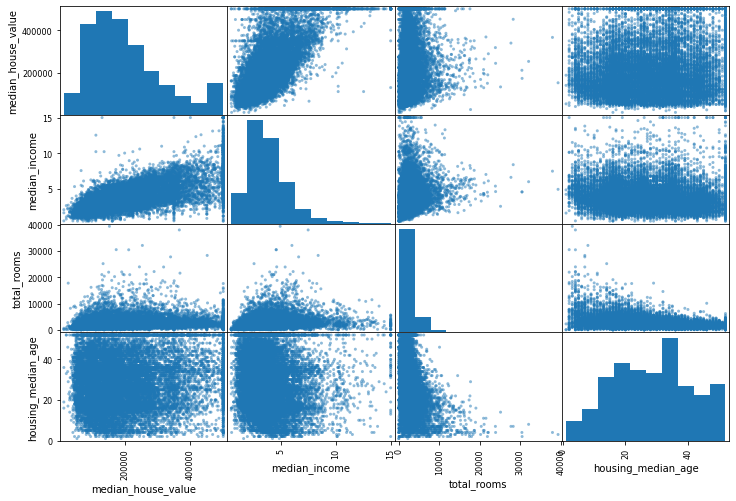

In [36]:
# Another way to check the correlation between the numerical attributes
# get the important numerical attributes along with the target
from pandas.plotting import scatter_matrix
attributes=["median_house_value", "median_income", "total_rooms","housing_median_age"]

scatter_matrix(housing_train[attributes], figsize=(12,8))
plt.show()

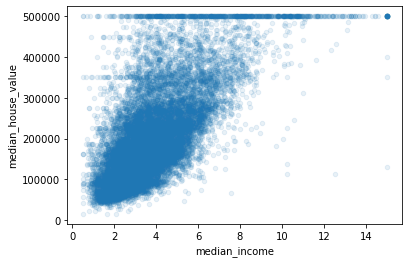

In [37]:
# most promising plot is the median_house_value and median_income, let plot this again to see the 
# patter clearly
housing_train.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.show()

We can clearly see horizontal line for 500000(capped value), 450000, 350000. We should try to remove
the corresponding districts to prevent the algorithm from learning to reproduce these quirks.

In [38]:
#Let calculate number for rooms per household
housing_train["rooms_per_household"] = housing_train["total_rooms"]/ housing_train["households"]

# lets calculate number of bedrooms per rooms
housing_train["bedrooms_per_household"] = housing_train["total_bedrooms"]/ housing_train["households"]

# Lets calculate number of population per household
housing_train["population_per_household"] = housing_train["population"]/ housing_train["households"]

In [39]:
# lets check the correlation again
corr_matrix = housing_train.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
bedrooms_per_household     -0.043343
longitude                  -0.047432
latitude                   -0.142724
Name: median_house_value, dtype: float64

In [40]:
# rooms_per_household has small positive correlation with median_house_value. This makes sense as number of
# rooms in the house increase, the median value of the house increase, bigger the house, more expensive
# it is

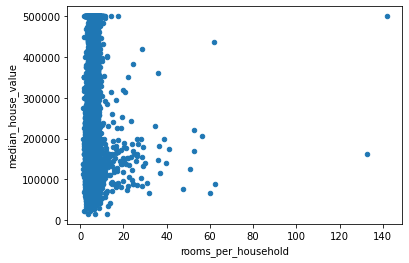

In [41]:
housing_train.plot(kind="scatter", x="rooms_per_household", y="median_house_value")
plt.show()

Now we have got some insights, lets prepare the data for machine learning algorithm

In [42]:
# split the features and label as we don't want to apply the same transformation on features and label
X_train = strat_train_set.drop(labels=["median_house_value"], axis=1)
y_train = strat_train_set["median_house_value"].copy()

### Data Cleaning

In [43]:
X_train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [44]:
X_train.isnull().mean()*100

longitude             0.00000
latitude              0.00000
housing_median_age    0.00000
total_rooms           0.00000
total_bedrooms        0.95688
population            0.00000
households            0.00000
median_income         0.00000
ocean_proximity       0.00000
dtype: float64

In [45]:
# Null values in the total_bedrooms are approx 1% of the whole dataset which is very less, we can 
# either remove these rows or impute them with either mean or median

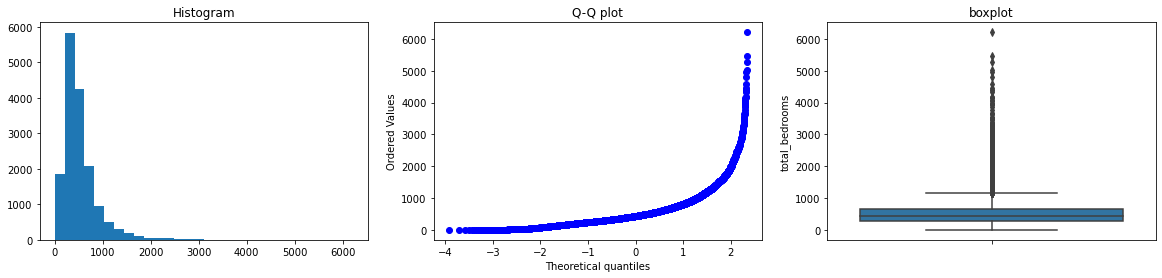

In [46]:
data_distribution(X_train, "total_bedrooms")

In [47]:
# we can use SimpleImputer from Scikit learn to impute the missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [48]:
# Since median can only be calculated on the numerical attributes, we need to remove ocean_proximity
# getting the numerical attributes
numerics = ['int16','int32', 'int64', 'float16', 'float32', 'float64']
numerics_var = X_train.select_dtypes(include=numerics).columns
numerics_var

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [49]:
X_train_num = X_train[numerics_var]

In [50]:
# fitting the imputer
imputer.fit(X_train_num)

SimpleImputer(strategy='median')

 imputer has calculated the median of each column and stored it in statistics_ instance variable.
 now only the total_bedrooms has missing value but we cannot be sure that there won't be any missing
 data in the new dataset, hence it is safer to apply imputer to all numerical attributes

In [51]:
# median for each column
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [52]:
# lets verify the median
X_train_num.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2119.5000
total_bedrooms         433.0000
population            1164.0000
households             408.0000
median_income            3.5409
dtype: float64

In [53]:
# lets replace the missing value by applying transform on X_train_num
X = imputer.transform(X_train_num)

In [54]:
# X is the numpy array, we need to convert it into a dataframe
housing_tr = pd.DataFrame(X, columns =X_train_num.columns)  
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [55]:
#checking null values
housing_tr.isnull().mean()*100

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
dtype: float64

### Handling Categorical attributes

In [56]:
X_train_cat = X_train[["ocean_proximity"]]
X_train_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [57]:
# OneHotEncoding
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
X_train_cat_1hot = cat_encoder.fit_transform(X_train_cat)
X_train_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [58]:
# Sparse matrix only stores the location of non-zero elements, hence cut down the memory wastage because
# of lot of zeros
# Anyways, lets convert the sparse matrinx into a numpy array
X_train_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [59]:
# list of categories for OneHotEcoder
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Please note we have large number of categories, we will get large input feature after oneHotEncoding
this can slow down the machine learning performance, and will take time
In that sense it is better to replace the variable with some other numerical variables or use Embedding.

### Custom Transformers

We need to write custom transfomers to combine specific attributes or to do some custom cleanup.
We need to write it in a class so that these can be called from scikit learn data pipelines easily

In [60]:
housing_tr.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [61]:
# getting index for all columns
for feature in housing_tr.columns:
    index = housing_tr.columns.get_loc(feature)
    print(feature," has index: ", index)

longitude  has index:  0
latitude  has index:  1
housing_median_age  has index:  2
total_rooms  has index:  3
total_bedrooms  has index:  4
population  has index:  5
households  has index:  6
median_income  has index:  7


In [62]:
from sklearn.base import BaseEstimator, TransformerMixin
# Adding BaseEstimator as a base class, we will get two methods get_params(), set_params()
# Adding TransformerMixin as a base class will give fit_transform()
room_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [63]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:,room_ix] / X[:,households_ix]
        population_per_household = X[:,population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,room_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

Please note tha add_bedrooms_per_rooms is working as the parameter, we can add any number of parameters
to try different combination of features for our model training and see which is giving good prediction

In [64]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)

In [65]:
attr_adder

CombinedAttributesAdder(add_bedrooms_per_room=False)

In [66]:
housing_extra_attrib = attr_adder.transform(X_train.values)

In [67]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [68]:
pd.DataFrame(housing_extra_attrib, columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'population_per_household'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,2.094395
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.008850,2.707965
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,2.025974
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,4.135977
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.505810,3.047847
...,...,...,...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND,6.052381,2.728571
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND,4.635659,4.077519
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND,6.346405,2.742484
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN,5.505618,3.808989


### Transformation Pipelines

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [70]:
# this pipeline is for numeric data
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [71]:
housing_nm_tr = num_pipeline.fit_transform(X_train_num)

In [72]:
housing_nm_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [73]:
list(X_train_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [74]:
from sklearn.compose import ColumnTransformer

num_attrib = list(X_train_num)
cat_attrib = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attrib),
    ("cat", OneHotEncoder(), cat_attrib)
], remainder="passthrough") # this will make sure all the leftover columns won't be dropped

In [75]:
housing_prepared = full_pipeline.fit_transform(X_train)

In [76]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

### Training and Evaluating on the Training Set

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,y_train)

LinearRegression()

In [79]:
# test the predictions on some observations from the training data
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [80]:
print('Pedictions: ', lin_reg.predict(some_data_prepared))

Pedictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [81]:
print("Labels: ", list(some_labels))

Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [82]:
# predictions are not accurate and not good
(286600 - 210644)/210644
# first observation is 36% off from the actual observation

0.36058943050834585

In [83]:
# lets check the RMSE on the training data
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)

In [84]:
lin_mse = mean_squared_error(y_train, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

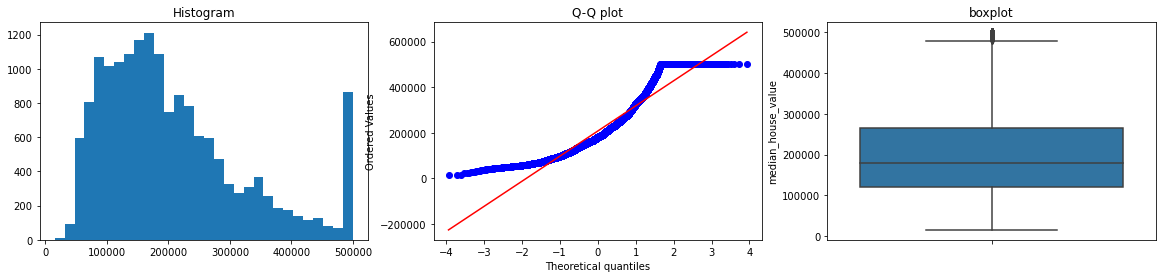

In [85]:
data_distribution(strat_train_set, "median_house_value")

Most districts median_housing_values range between $120,000  
and  
$265,000, so a typical prediction
error of $68,628 is not very satisfying.

This is the case of underfitting. This means either features are not good enough or model is not
complex enough. This model has high bias.

We can try with more complex model or try to do add some more features like adding log transformation of some features such as population to see if that increase the accuracy or decrease the rmse.

### Lets try more complex models such as DecisionTree

In [86]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, y_train)

DecisionTreeRegressor()

In [87]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(y_train, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Whattttttttttt!!!!!😮😮😮😮😮😮😮😮😮.

No error. This doesn't seem good. It is more likely that model overfits the data perfectly.

In [88]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, y_train,
                        scoring='neg_mean_squared_error', cv=10)

In [89]:
scores

array([-4.83006042e+09, -4.84447221e+09, -5.04769687e+09, -4.78364638e+09,
       -5.12230115e+09, -5.54646234e+09, -5.09866702e+09, -4.92865060e+09,
       -5.99703991e+09, -4.81053778e+09])

In [90]:
# mean_square_error for scoring in cross_val_score doesn't work, it valid score function is 
# 'neg_mean_squared_error'. It give negative scores, hence we need to flip the signs
tree_rmse_scores = np.sqrt(-scores)

In [91]:
# Creating a function to calculate the mean score and its standard deviations
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [92]:
display_scores(tree_rmse_scores)

Scores:  [69498.63608964 69602.24283249 71047.14542015 69163.90949257
 71570.25324399 74474.57513335 71404.95091507 70204.34889863
 77440.55723631 69358.04049647]
Mean:  71376.46597586691
Standard deviation:  2520.6292664053435


Now decision tree is not looking good, its mean error is around 71136.173 with standard deviation of
2591.31.

### Let's compute the cross_val_score for Linear Regression

In [93]:
lin_scores = cross_val_score(lin_reg, housing_prepared, y_train,
                            scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [94]:
display_scores(lin_rmse_scores)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard deviation:  2731.6740017983493


We can see now that DecisionTree is overfitting the model that it performs worse than linear regressor


### Lets try RandomForestRegressor now

In [95]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, y_train)

forest_reg_scores = cross_val_score(forest_reg, housing_prepared, y_train,
                                   scoring = 'neg_mean_squared_error', cv=10)
forest_reg_rmse_scores = np.sqrt(-forest_reg_scores)

In [96]:
display_scores(forest_reg_rmse_scores)

Scores:  [49177.27872004 47507.12890876 50021.89007307 52145.23218622
 49501.54616004 53585.74318296 48892.75947673 47873.54470447
 52584.06168086 49970.44652624]
Mean:  50125.963161938955
Standard deviation:  1920.0823417670629


This is much better than LinearRegressor and DecisionTree.

### Fine tune the model

### Grid Search

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap': [False],'n_estimators':[3,10], 'max_features':[2,3,4]}
]

In [99]:
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

In [101]:
grid_search.fit(housing_prepared, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [103]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

Since we get the maximum parameter, we should go for more to see the best parameter for this model.

In [105]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

Running RandomForestRegressor with hyperparameters with more values

In [107]:
param_grid = [
    {'n_estimators':[30,60,90], 'max_features':[8,10,12,14]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [8, 10, 12, 14],
                          'n_estimators': [30, 60, 90]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [108]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 90}

In [133]:
# to get the model
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=90)

In [109]:
# checking scores for each hyperparameter combination
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49903.94054961198 {'max_features': 8, 'n_estimators': 30}
49552.09770157454 {'max_features': 8, 'n_estimators': 60}
49382.29488120274 {'max_features': 8, 'n_estimators': 90}
50387.49798953516 {'max_features': 10, 'n_estimators': 30}
49483.906904724485 {'max_features': 10, 'n_estimators': 60}
49536.49081483981 {'max_features': 10, 'n_estimators': 90}
50534.5549080499 {'max_features': 12, 'n_estimators': 30}
50016.47230384589 {'max_features': 12, 'n_estimators': 60}
49751.0557507819 {'max_features': 12, 'n_estimators': 90}
50805.61743975565 {'max_features': 14, 'n_estimators': 30}
50385.05402852913 {'max_features': 14, 'n_estimators': 60}
50225.52733336801 {'max_features': 14, 'n_estimators': 90}


We can try Randomized Search

### Analyzing the model and its important features

In [110]:
# we can analyze randomforest to see which feature has more importance, may be remove the least
# important feature which helps nothing in predicting the output or may be add some more features
# to improve the accuracy

In [112]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.18888272e-02, 6.54096994e-02, 4.30422390e-02, 1.54290770e-02,
       1.49283528e-02, 1.49253494e-02, 1.44188465e-02, 3.52226088e-01,
       5.46733806e-02, 1.11638409e-01, 6.87961906e-02, 7.58322666e-03,
       1.59022068e-01, 8.03897187e-05, 2.09457657e-03, 3.84327973e-03])

Lets display these importance scores next to their corresponding attribute names

In [122]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold","bedrooms_per_room"]
# running only the categorical transfomer from the full pipeline
cat_encoder = full_pipeline.named_transformers_["cat"] 

In [123]:
cat_encoder.categories_[0]

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [129]:
cat_one_hot_attribs = list(cat_encoder.categories_[0])

In [130]:
attributes = num_attrib + extra_attribs + cat_one_hot_attribs

In [131]:
attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_hhold',
 'pop_per_hhold',
 'bedrooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [132]:
# Sorting the feature based on their importance
sorted(zip(feature_importances, attributes), reverse=True)

[(0.35222608810582334, 'median_income'),
 (0.15902206791184875, 'INLAND'),
 (0.1116384087911051, 'pop_per_hhold'),
 (0.07188882720804837, 'longitude'),
 (0.06879619059479578, 'bedrooms_per_room'),
 (0.0654096994020229, 'latitude'),
 (0.054673380619132496, 'rooms_per_hhold'),
 (0.0430422390430715, 'housing_median_age'),
 (0.015429077004111856, 'total_rooms'),
 (0.01492835281320635, 'total_bedrooms'),
 (0.014925349371932982, 'population'),
 (0.014418846461057054, 'households'),
 (0.007583226656845933, '<1H OCEAN'),
 (0.003843279726412228, 'NEAR OCEAN'),
 (0.0020945765719009857, 'NEAR BAY'),
 (8.038971868426534e-05, 'ISLAND')]

We can see that categories other than Ocean_proximity didn't come, that means they are not useful
in predicting the house price, hence better to remove them and try the model again.

### Evaluate the model on Test set

In [134]:
final_model = grid_search.best_estimator_

In [135]:
final_model

RandomForestRegressor(max_features=8, n_estimators=90)

In [136]:
X_test = strat_test_set.drop(labels=["median_house_value"], axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [137]:
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

In [138]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47012.37255926013

### 95% Confidence Interval for the model

In [141]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) -1 ,
                        loc = squared_errors.mean(),
                        scale= stats.sem(squared_errors)))

array([45033.14325454, 48911.57691096])